In [57]:
!sudo apt-get install -y fonts-Malgun Gothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-Malgun
E: Unable to locate package Gothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/v

In [58]:
import matplotlib
import matplotlib.font_manager as fm


def korean_font():
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False  # 차트 시각화 할때 ( - ) 부호 처리


Text(0.5, 0, '$\\mu$')

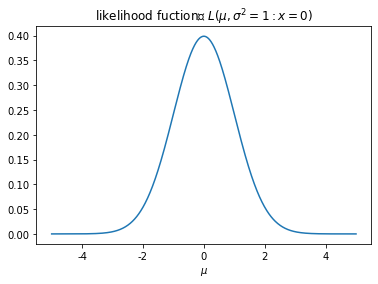

In [63]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

def likelihood_mu(mu):
  # norm().pdf(0) : 정규 분포 확률 밀도 함수
  # pdf(x) : x 범위에 따른 정규확률 밀도
  return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5,5,1000)
like_mu = [likelihood_mu(m) for m in mus]
plt.plot(mus,like_mu)
plt.title('likelihood fuction $L(\mu,\sigma^2=1: x=0)$')
plt.xlabel('$\mu$')



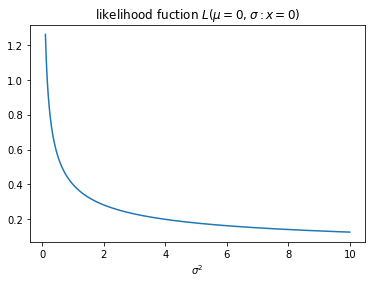

In [45]:
from numpy.core.function_base import linspace
def likelihood_sigma2(sigma2):
  return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1,10,1000) 
lile_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

korean_font()
plt.plot(sigma2s,lile_sigma2)
plt.title('likelihood fuction $L(\mu=0,\sigma: x=0)$')
plt.xlabel('$\sigma^2$')
plt.show()

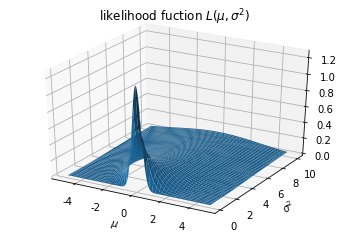

In [61]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L= np.exp(-MU**2/(2*SIGMA2)) / np.sqrt(2*np.pi*SIGMA2)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU,SIGMA2,L,linewidth = 0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('likelihood fuction $L(\mu,\sigma^2)$')
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)


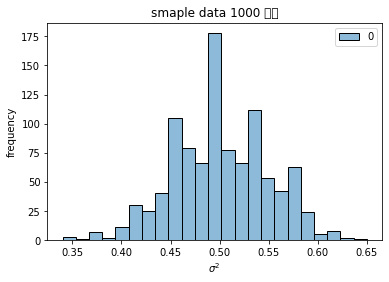

In [68]:
import pandas as pd
import seaborn as sns

# 중심 극한 정리
def central_limit_th(cnt):
  bag_of_mean = []
  for i in range(cnt):
    # 이항분포에서 랜덤 표본 추출
    m = np.random.binomial(n=1,p=0.5,size=100).mean()
    bag_of_mean.append(m)    
  
  df = pd.DataFrame(bag_of_mean)
  korean_font()
  # plt.hist(df)
  ax = sns.histplot(df)
  plt.title(f'smaple data {cnt} 수집') # 표본 데이터
  plt.xlabel('$\sigma^2$')
  plt.ylabel('frequency') # 빈도수
  plt.show()

central_limit_th(1000)

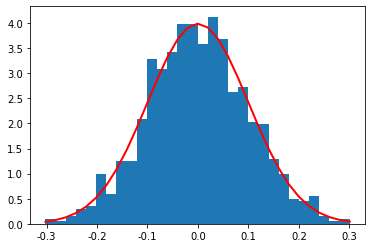

In [69]:
# 가우스 함수 
mu, sigma = 0,0.1
s=np.random.normal(loc=mu,scale=sigma,size=1000)
cnt, bins, g = plt.hist(s,30,density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.show()